In [ ]:
import pandas as pd

In [ ]:
fitts_data = pd.read_csv('fitts_perforamance.csv',header=0,sep = '\t')

In [ ]:
fitts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trial   378 non-null    int64  
 1   W       378 non-null    float64
 2   A       378 non-null    float64
 3   ID      378 non-null    float64
 4   MT      378 non-null    int64  
 5   IP      378 non-null    float64
 6   class   378 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 20.8+ KB


In [ ]:
fitts_data["class"].value_counts()

V-VA    311
V-NA     60
S-VA      7
Name: class, dtype: int64

In [ ]:
X = fitts_data.drop(['Trial','class'],axis = 1)
y = fitts_data['class']

In [ ]:
X.head(5)

,W,A,ID,MT,IP
0,0.05,241.38,12.2,197,0.061929
1,0.05,763.80,13.9,168,0.082738
2,0.05,471.49,13.2,153,0.086275
3,0.05,33.55,9.4,96,0.097917
4,0.05,817.04,14.0,124,0.112903


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
scaled_X

array([[0.        , 0.15565642, 0.828125  , 1.        , 0.        ],
       [0.        , 0.49294965, 0.9609375 , 0.85204082, 0.00159603],
       [0.        , 0.30422375, 0.90625   , 0.7755102 , 0.00186727],
       ...,
       [0.        , 0.22426817, 0.875     , 0.        , 0.97699046],
       [0.        , 0.22924603, 0.875     , 0.        , 0.97699046],
       [0.        , 0.28496443, 0.8984375 , 0.        , 1.        ]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,precision_recall_fscore_support
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, encoded_y, test_size=0.2, random_state=42)


In [ ]:
# Initialize classifiers
classifiers = {
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "LinearSVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "MLP": MLPClassifier(),
}

In [ ]:
# Initialize data structures to store performance metrics
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
confusion_matrices = []
auc_results = []

In [ ]:
y_test.shape

(76,)

In [ ]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("y_pred shape:",y_pred.shape)

y_pred shape: (76,)
y_pred shape: (76,)
y_pred shape: (76,)
y_pred shape: (76,)
y_pred shape: (76,)
y_pred shape: (76,)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Train and evaluate individual classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    # auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Save results for plotting
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)
    confusion_matrices.append(cm)
    # auc_results.append(auc)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Plotting results without ensemble classifiers
labels = list(classifiers.keys())

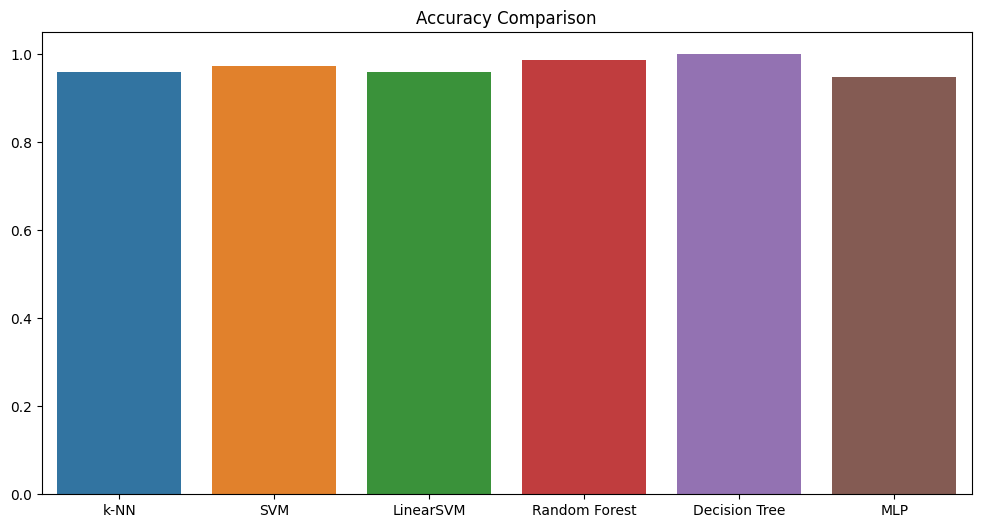

In [ ]:
# Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=accuracy_results)
plt.title('Accuracy Comparison')
plt.show()

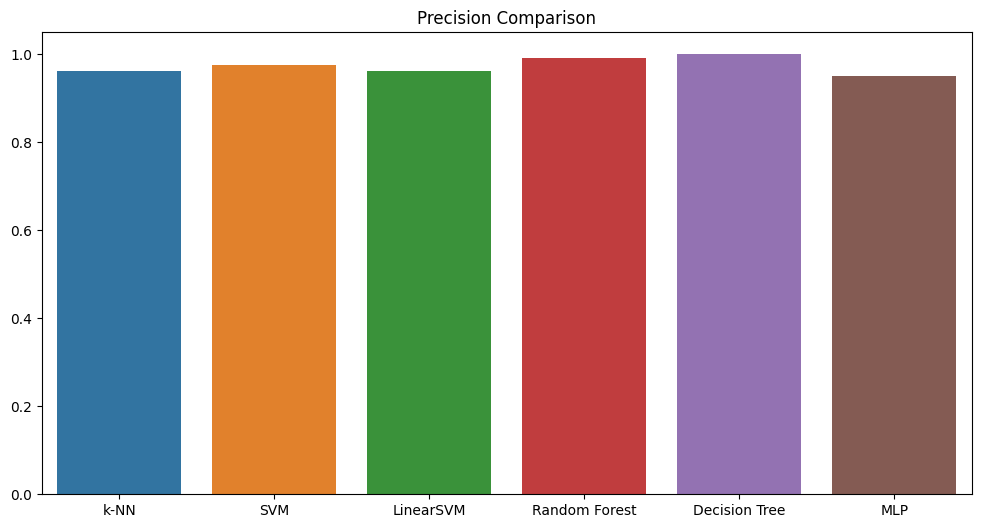

In [ ]:
# Precision
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=precision_results)
plt.title('Precision Comparison')
plt.show()

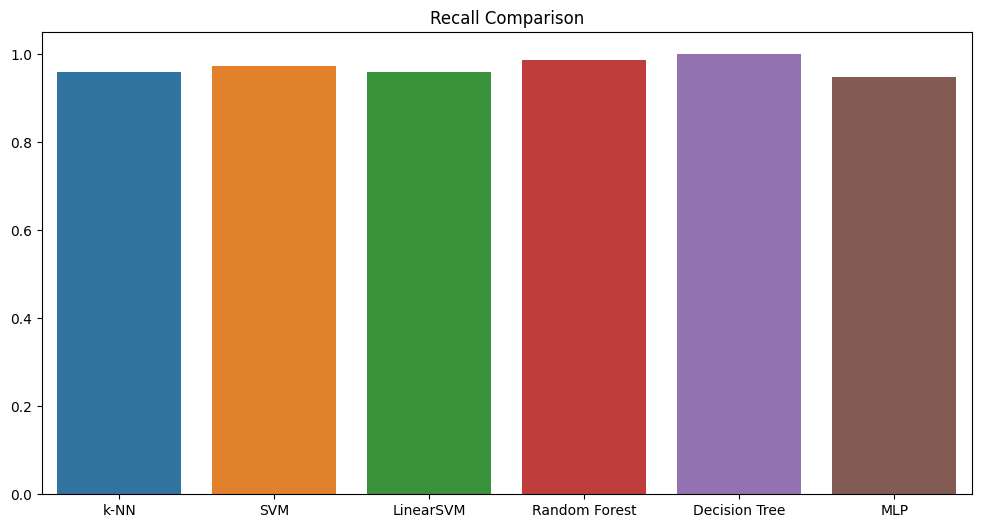

In [ ]:
# Recall
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=recall_results)
plt.title('Recall Comparison')
plt.show()

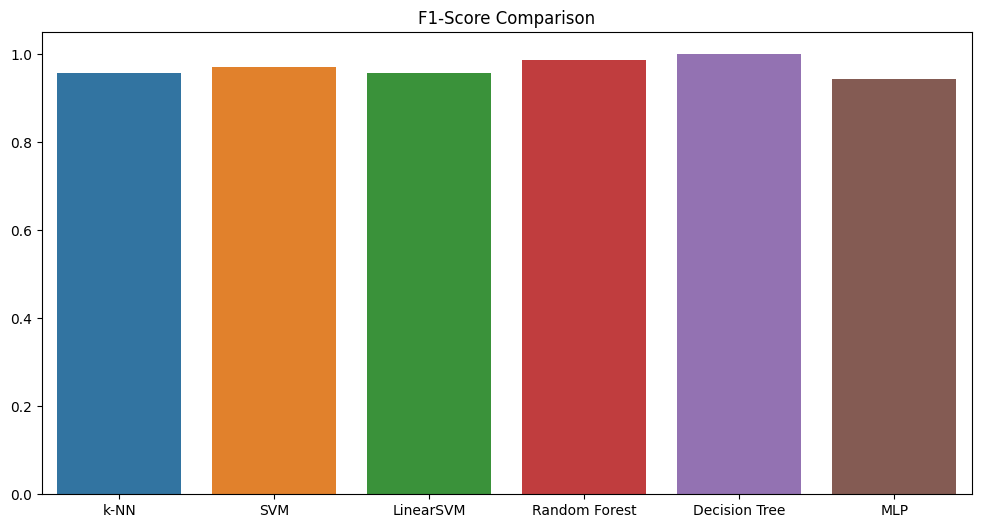

In [ ]:
# F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=f1_results)
plt.title('F1-Score Comparison')
plt.show()

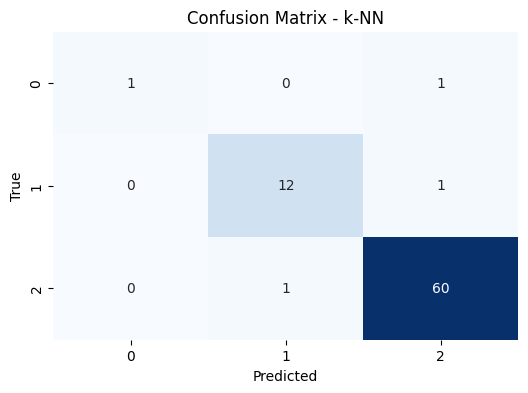

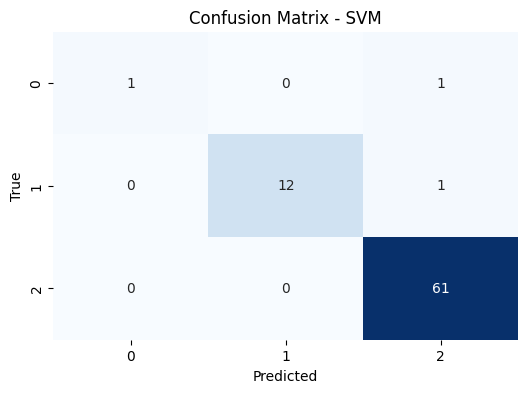

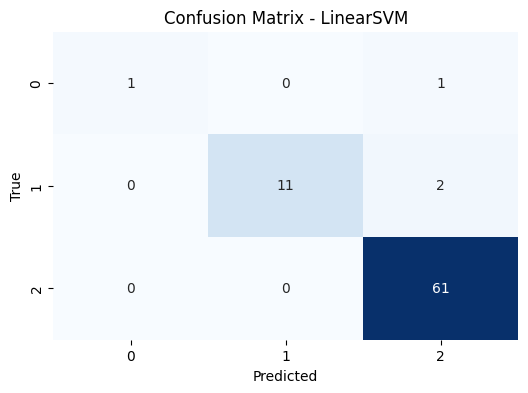

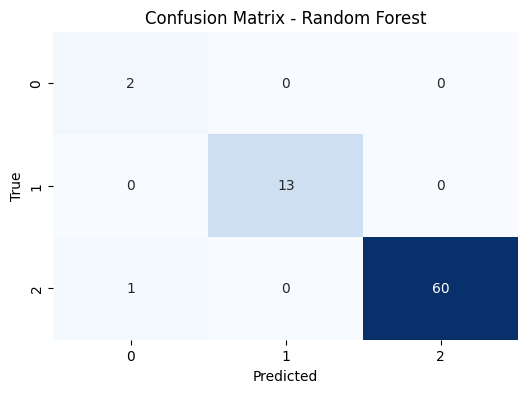

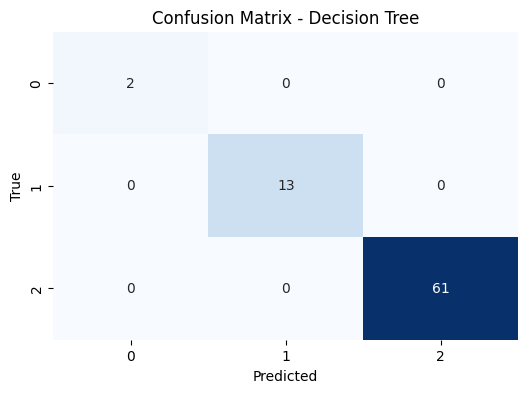

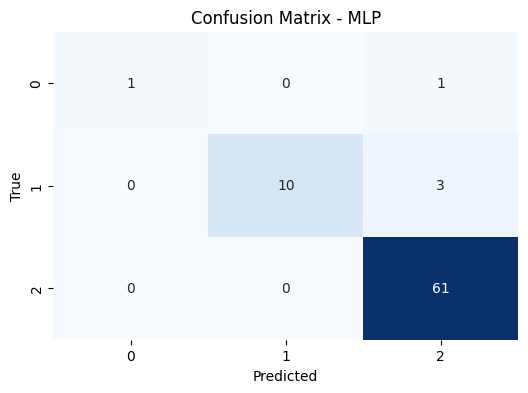

In [ ]:
# Confusion Matrix
for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  cbar=False)
    plt.title(f'Confusion Matrix - {list(classifiers.keys())[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
# Ensemble Learners
ensemble_classifiers = {
    "AdaBoost": AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
    "Bagging": BaggingClassifier(base_estimator=DecisionTreeClassifier()),
}

In [ ]:
# Initialize data structures to store performance metrics for ensemble classifiers
ensemble_accuracy_results = []
ensemble_precision_results = []
ensemble_recall_results = []
ensemble_f1_results = []
ensemble_confusion_matrices = []
ensemble_auc_results = []

In [ ]:
# Train and evaluate ensemble classifiers
for name, clf in ensemble_classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    # auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Save results for plotting
    ensemble_accuracy_results.append(accuracy)
    ensemble_precision_results.append(precision)
    ensemble_recall_results.append(recall)
    ensemble_f1_results.append(f1)
    ensemble_confusion_matrices.append(cm)
    # ensemble_auc_results.append(auc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Plotting results with ensemble classifiers
ensemble_labels = list(ensemble_classifiers.keys())


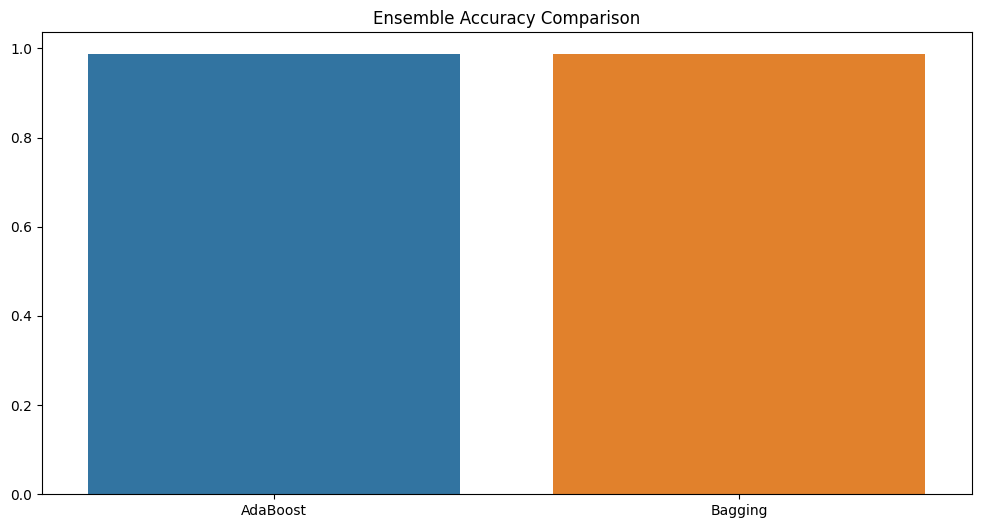

In [ ]:
# Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x=ensemble_labels, y=ensemble_accuracy_results)
plt.title('Ensemble Accuracy Comparison')
plt.show()


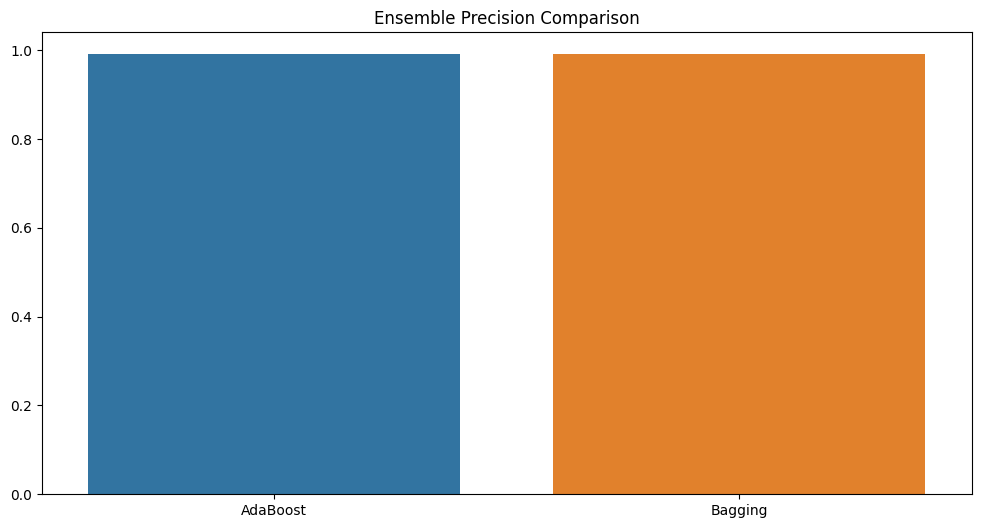

In [ ]:
# Precision
plt.figure(figsize=(12, 6))
sns.barplot(x=ensemble_labels, y=ensemble_precision_results)
plt.title('Ensemble Precision Comparison')
plt.show()

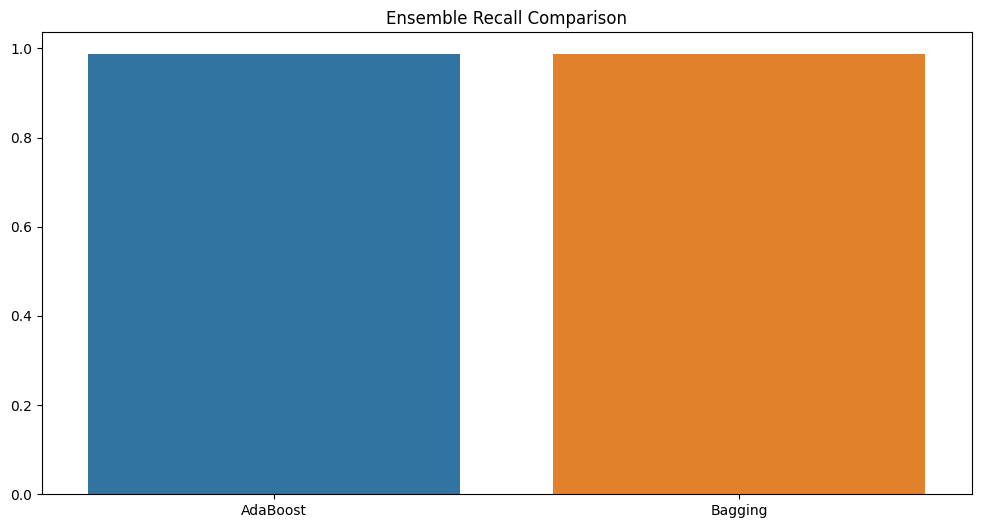

In [ ]:
# Recall
plt.figure(figsize=(12, 6))
sns.barplot(x=ensemble_labels, y=ensemble_recall_results)
plt.title('Ensemble Recall Comparison')
plt.show()

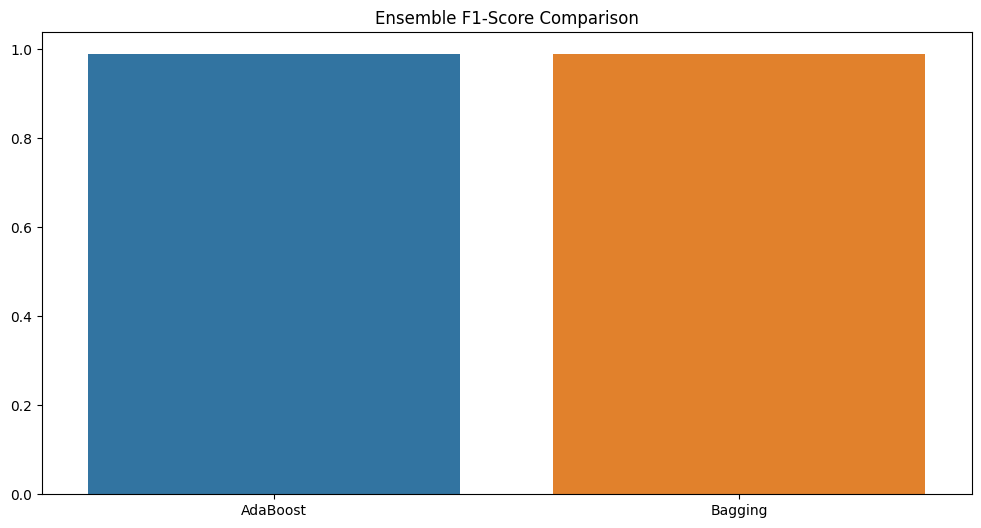

In [ ]:
# F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(x=ensemble_labels, y=ensemble_f1_results)
plt.title('Ensemble F1-Score Comparison')
plt.show()

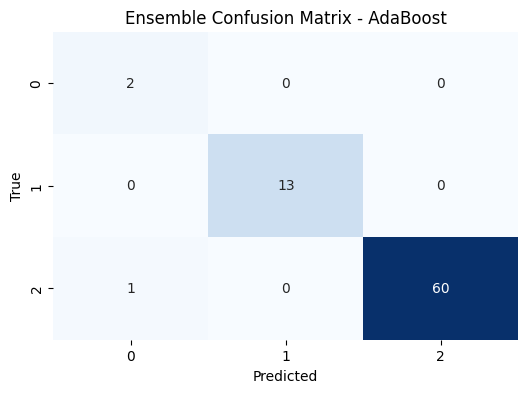

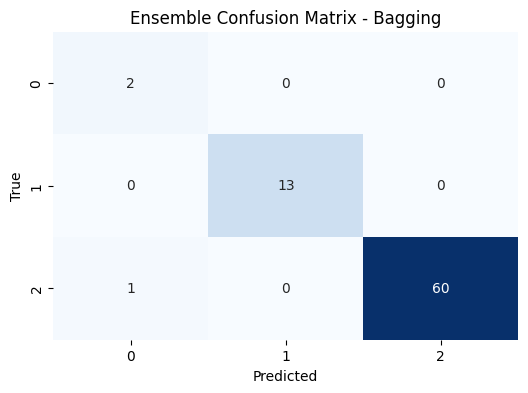

In [ ]:
  # Confusion Matrix
for i, cm in enumerate(ensemble_confusion_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  cbar=False)
    plt.title(f'Ensemble Confusion Matrix - {list(ensemble_classifiers.keys())[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
final_accuracy_results=[]
final_precision_results=[]
final_recall_results=[]
final_f1_results=[]
final_confusion_matrices=[]
final_auc_results=[]
final_label = []

In [ ]:
# Save results for plotting
final_accuracy_results.extend(accuracy_results)
final_accuracy_results.extend(ensemble_accuracy_results)
final_precision_results.extend(precision_results)
final_precision_results.extend(ensemble_precision_results)
final_recall_results.extend(recall_results)
final_recall_results.extend(ensemble_recall_results)
final_f1_results.extend(f1_results)
final_f1_results.extend(ensemble_f1_results)
final_confusion_matrices.extend(confusion_matrices)
final_confusion_matrices.extend(ensemble_confusion_matrices)
# final_auc_results.extend(auc_results)
# final_auc_results.extend(auc_results)

final_label.extend(labels)
final_label.extend(ensemble_labels)

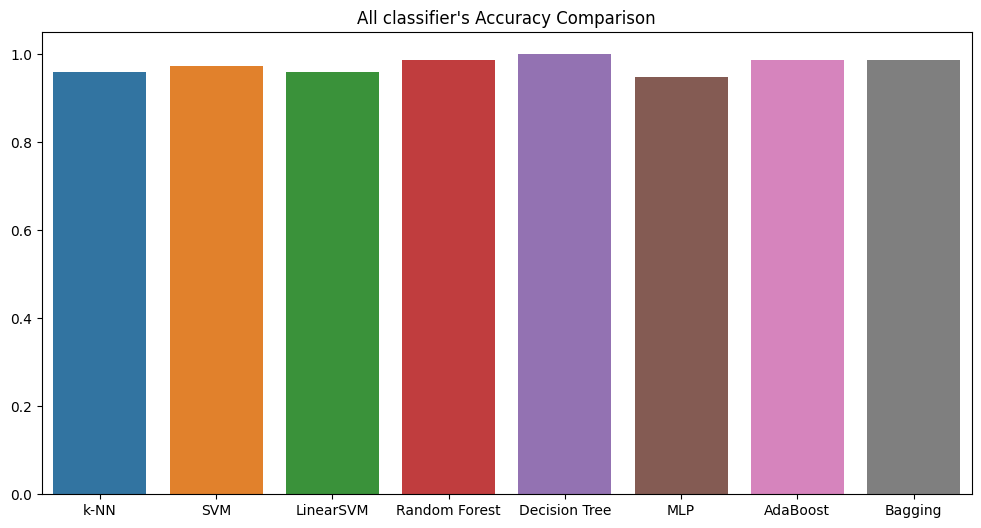

In [ ]:
# Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x=final_label, y=final_accuracy_results)
plt.title("All classifier's Accuracy Comparison")
plt.show()

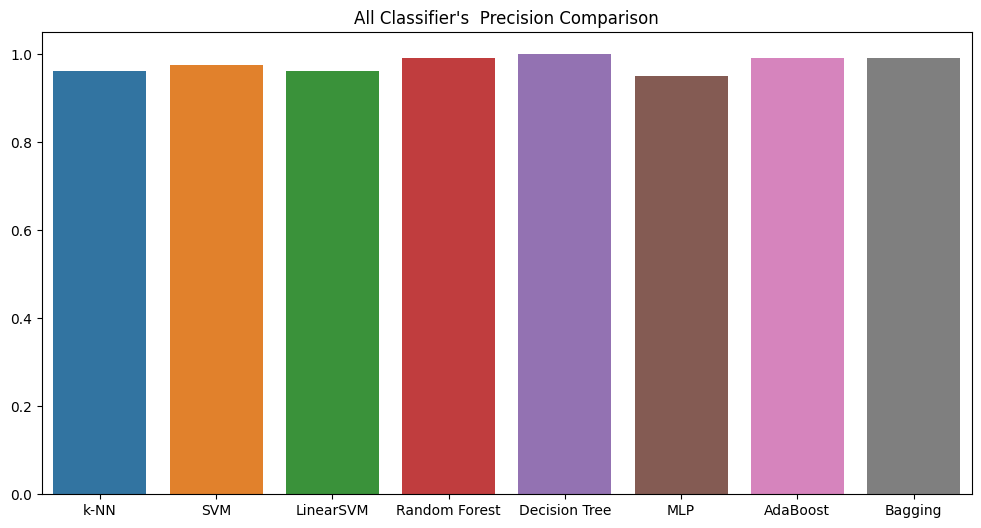

In [ ]:
# Precision
plt.figure(figsize=(12, 6))
sns.barplot(x=final_label, y=final_precision_results)
plt.title("All Classifier's  Precision Comparison")
plt.show()

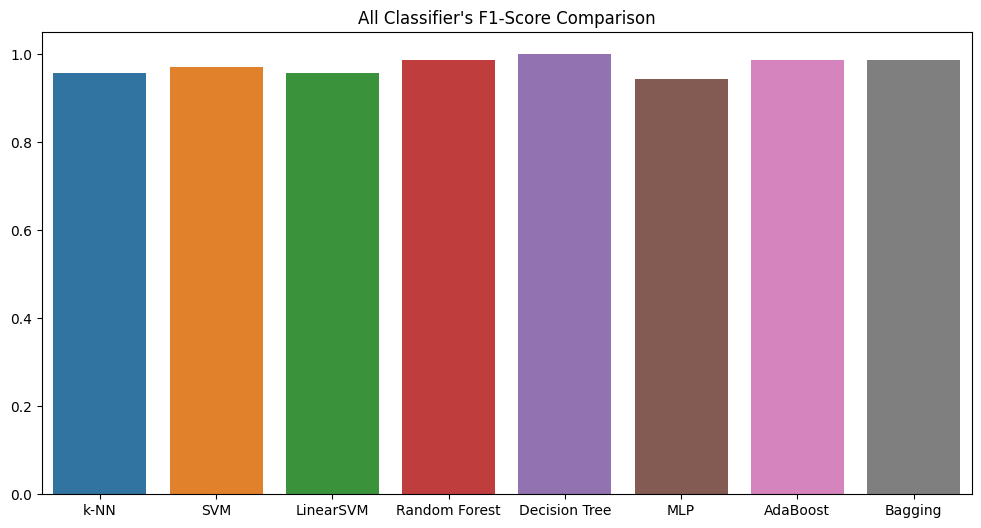

In [ ]:
# F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(x=final_label, y=final_f1_results)
plt.title("All Classifier's F1-Score Comparison")
plt.show()

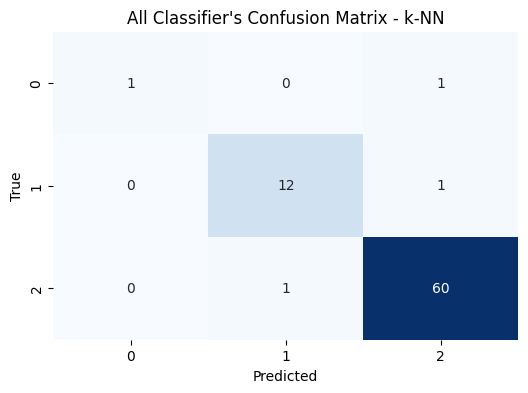

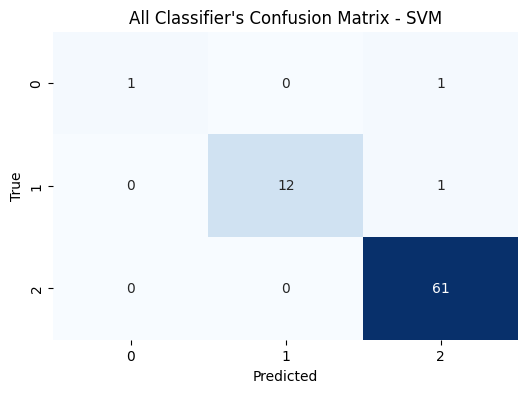

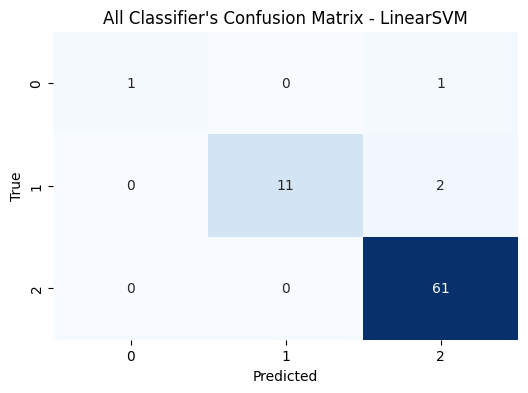

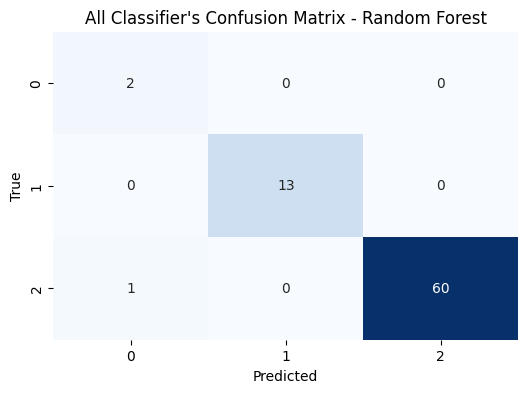

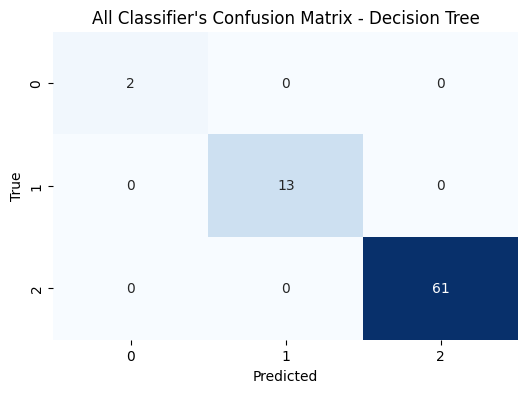

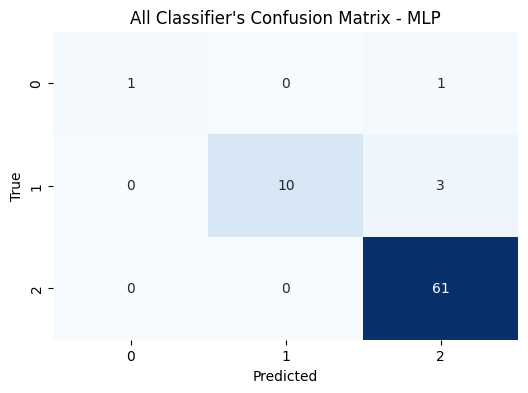

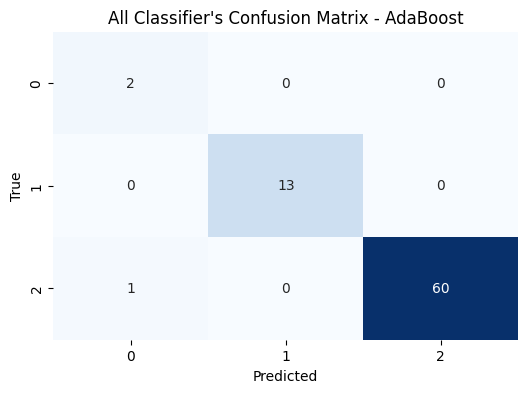

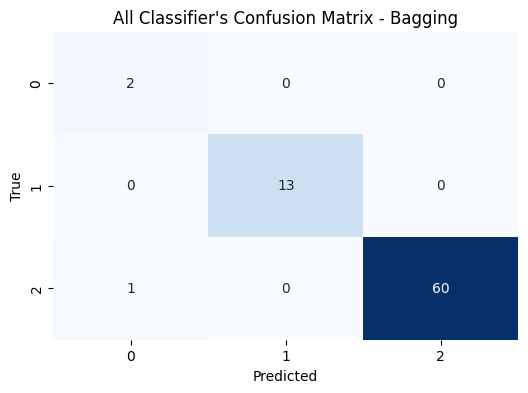

In [ ]:
  # Confusion Matrix
for i, cm in enumerate(final_confusion_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  cbar=False)
    plt.title(f"All Classifier's Confusion Matrix - {final_label[i]}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

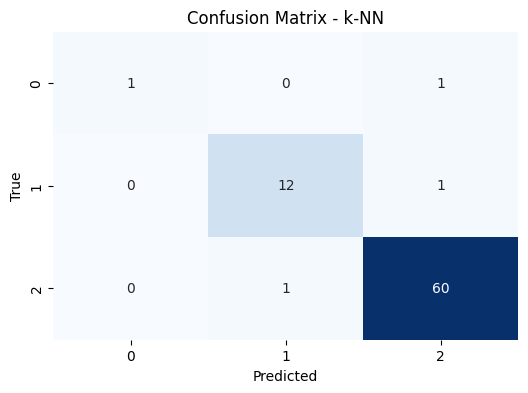

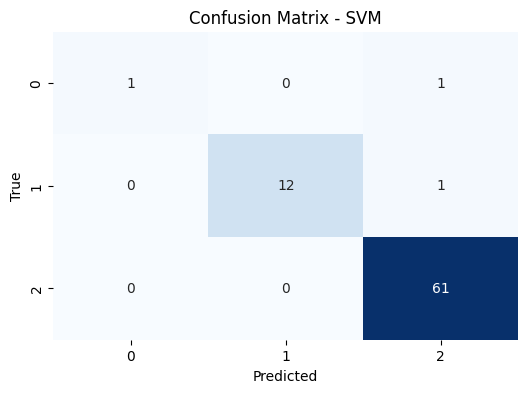

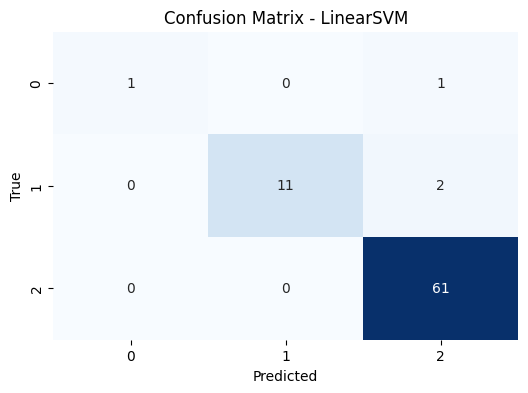

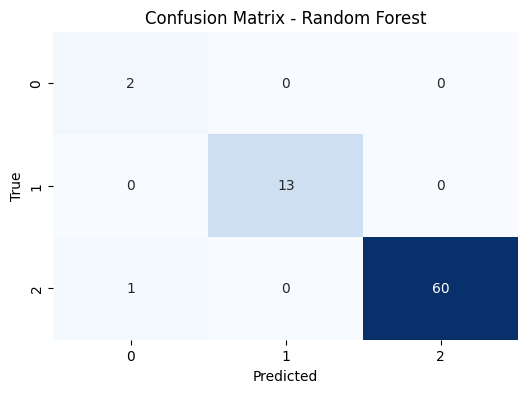

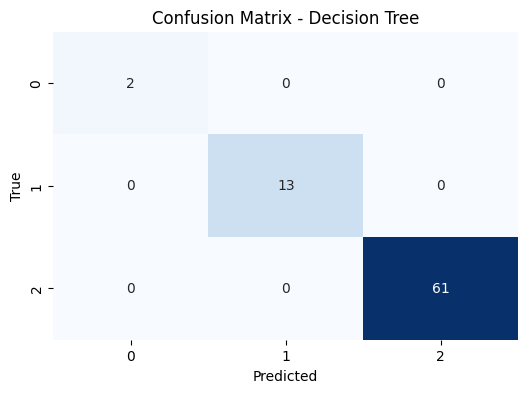

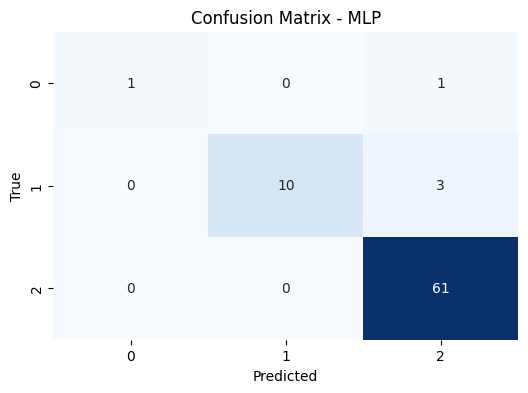